# Import Libraries

In [204]:
# Python Structs Type using for Wide Variety Mathematical Operations Like Arrays
import numpy as np 

# Working with the DataFrame
import pandas as pd

#Dealing With Warnings
import warnings

#from sklearn import preprocessing

In [205]:
# Importing the Model_SVM libarys

from sklearn.svm import SVR
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [206]:
#Store the data into the variable df

df = pd.read_csv('Bit_AfterClean.csv')

#Do not show warnings
warnings.filterwarnings("ignore")

# Prepring X,y

In [207]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 #n = 30 days

#Create another column (the target or dependent variable)
df['PREDICTION'] = df[['CLOSE']].shift(-prediction_days)

In [208]:
df3 = df.copy()

In [209]:
df = df.drop(["CLOSE"], axis =1)

In [210]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['PREDICTION'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(df)-prediction_days]

In [211]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) y = np.array(df['Prediction'])  
# Get all of the y values except the last 'n' rows 
y = np.array(df['PREDICTION']) 
y = y[:-prediction_days] 

# Best Parameters For SVM-Model

In [212]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(df.drop(['PREDICTION'],1))[:prediction_days]

In [214]:
# Best Params To SVR_Models
Cs = [1000,10000]
gammas = [1e-07,1e-06,1e-05]
param_grid = {'gamma' : gammas, 'C': Cs}
grid_search = GridSearchCV(svm.SVR(), param_grid, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 10000, 'gamma': 1e-07}


In [215]:
# Create and train the Support Vector Machine 
svr_rbf = SVR(C=10000, gamma= 1e-07)#Create the model
svr_rbf.fit(x_train, y_train) #Train the model

SVR(C=10000, gamma=1e-07)

In [216]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.9179779413011668


In [217]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)

# Predict's Results

In [220]:
svm_prediction

array([43985.62108333, 53258.18818625, 57319.92203418, 56448.90103179,
       54924.03779393, 40370.35622871, 41809.57058491, 47060.26166758,
       34657.67431141, 42600.04936893, 36993.0846985 , 37617.236791  ,
       45064.83837131, 46390.70214801, 45112.92256566, 45870.00628225,
       46694.32440948, 46561.440876  , 51123.7051575 , 57903.69334693,
       54781.55694061, 49387.25959307, 45475.79512167, 50475.94472099,
       57658.14753191, 59892.20572993, 60172.15127982, 58510.12602982,
       51791.55686202, 49502.05595381])

Text(0, 0.5, '$ Close')

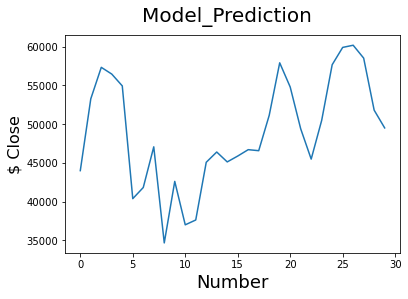

In [219]:
# Plot for the next 'n=30' days
import matplotlib.pyplot as plt
plt.plot(svm_prediction)
plt.suptitle('Model_Prediction', fontsize=20)  
plt.xlabel('Number', fontsize=18)                     
plt.ylabel('$ Close', fontsize=16) 

Text(0, 0.5, '$ Price')

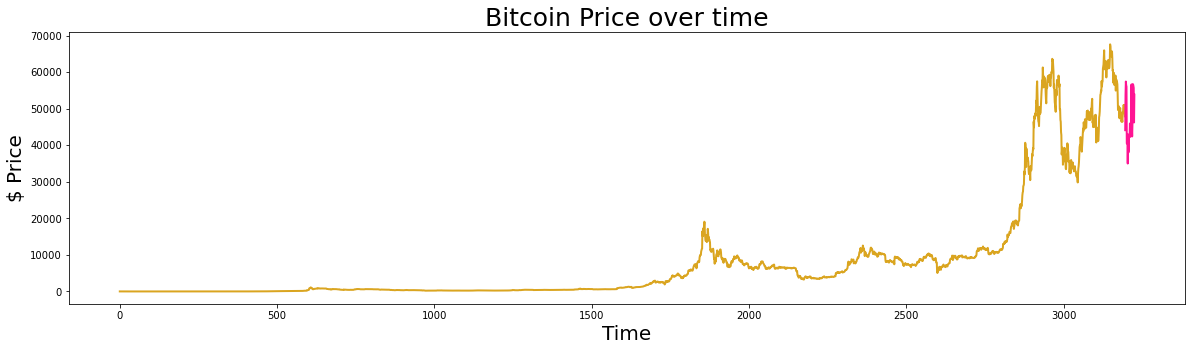

In [192]:
# Will Demonstate the Dates 
time1 =[]
time3 =[]
y = 3196
for i in range(0,3196):
    time.append(i)
    y-=1

k = 30
for j in range(3196,3226):
    time3.append(j)
    k-=1

#Time-line Plots
plt.figure(figsize = (20, 5))
plt.plot(time[0:3196], df3["CLOSE"][::-1], color='goldenrod', lw=2)
plt.plot(time3, svm_prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)